# Project: FBI Gun Data Deep Dive

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### <a id='intro'></a>
## Introduction

> In this project we will be analyzing the United States's gun ownership data. Specifically we will be looking for trends among citizens who own guns, and how they differ from citizens who do not.

### Some Questions:

* What is the estimated number of gun registrations by civilians per capita by state in 2010 and 2016?
* Which states have had the most gun registrations in 2010 and 2016?
* What was the most purchased type of gun in 2010? What was the most purchased type of gun in 2016?
* What is the percentage breakdown of registered gun types in 2017?

#### Project Goals
>* Ask questions
>* Clean FBI-gun data and census data (FBI-data and census-data need to match their data together before merging)
>* Merge both FBI-gun data and census data altogether
>* Answers the questions
>* Visualize the combined FBI-gun data and census data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

> In this section I will be cleaning up and cutting the fat off of the gun_data.csv and U.S. Census Data.csv datasets. I have saved gun_data.xlsx as a .csv file to make it easier to pull data.

### General Properties

In [2]:
# Loading my data and printing out a few lines so that I can perform operations to inspect the data
# types and look for instances of missing or possibly bad data.
gun = pd.read_csv('gun_data.csv')
cen = pd.read_csv('U.S. Census Data.csv')

### Cleaning the Data pt. 1 (Gun Data)

> I need to clean the gun data up a little bit. There are U.S. territories in gun_data.csv that isn't reflected in the U.S.  Census Data set surprisingly. This code will be removing those territories as well as separating the gun_data.csv data set  into two new .csv files; one reflecting total guns purchased in each state of the U.S. in 2010, and the same in 2016.

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
gun.shape

(12485, 27)

In [5]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [7]:
gun.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [8]:
# Note: As mentioned above, the Census data doesn't include Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands; 
# I'm going to remove them to match census data so that I can merge the data later on.

In [9]:
# removing name of the colonies : Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands 
gun = gun[gun.state != 'Guam']
gun = gun[gun.state != 'Puerto Rico']
gun = gun[gun.state != 'District of Columbia']
gun = gun[gun.state != 'Virgin Islands']
gun = gun[gun.state != 'Mariana Islands']

In [10]:
# dropping all the variables I don't need ---> to calculate per capita 
gun_capita = gun.drop([ 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [11]:
gun_capita.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In [12]:
gun_capita['month'] = pd.to_datetime(gun['month'])

In [13]:
gun_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   11350 non-null  datetime64[ns]
 1   state   11350 non-null  object        
 2   totals  11350 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 354.7+ KB


In [14]:
# getting the data from 2010
gun10 = gun_capita[gun_capita['month'] == '2010-04-01']
gun10.head(5)

,month,state,totals
4895,2010-04-01,Alabama,20791
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750


In [15]:
gun10.describe()

,totals
count,50.0000
mean,24517.7400
std,34280.1673
min,963.0000
25%,7197.5000
50%,15242.5000
75%,26335.5000
max,211261.0000


In [16]:
# getting the data from 2016
gun16 = gun_capita[gun_capita['month'] == '2016-07-01']
gun16.head(5)

,month,state,totals
770,2016-07-01,Alabama,48927
771,2016-07-01,Alaska,6793
772,2016-07-01,Arizona,34496
773,2016-07-01,Arkansas,19378
774,2016-07-01,California,190218


In [17]:
gun16.describe()

,totals
count,50.000000
mean,43710.400000
std,61544.999748
min,1565.000000
25%,11823.000000
50%,25379.500000
75%,46008.500000
max,363085.000000


In [18]:
# concatinating 2010 and 2016
concat_gun = pd.concat([gun10, gun16], keys = ['2010-04-01', '2016-07-01'], axis = 0)
concat_gun.head()

month       state  totals
2010-04-01 4895 2010-04-01     Alabama   20791
           4896 2010-04-01      Alaska    6411
           4897 2010-04-01     Arizona   16578
           4898 2010-04-01    Arkansas   14563
           4899 2010-04-01  California   80750

In [19]:
# resetting the index
concat_gun.reset_index(drop = True, inplace = True)

In [20]:
concat_gun.tail(5)

,month,state,totals
95,2016-07-01,Virginia,43574
96,2016-07-01,Washington,47887
97,2016-07-01,West Virginia,16791
98,2016-07-01,Wisconsin,38922
99,2016-07-01,Wyoming,4585


In [21]:
concat_gun.head(5)

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


### Cleaning the Data pt. 2 (US Census Data)

> I've also got to clean the US Census Data so that I can merge the two data sets later. I will be splitting the .csv into two separate data sets reflecting population estimates by state in both 2010, and 2016.

In [22]:
cen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [23]:
# droppping all the columns that aren't associated with gun_data and reset its index
cen = cen.drop(cen.index[65: 85]).reset_index()

In [24]:
# dropping the first column 'Fact Note'
cen = cen.drop(['Fact Note'], axis = 1)

In [25]:
# filling all of the NAs with 0.0
cen = cen.fillna(0.0)


source : https://stackoverflow.com/questions/38980714/pandas-setting-multi-index-on-rows-then-transposing-to-columns



In [26]:
# transposing the data in order to join with gun_data in the future
cen.set_index('Fact', inplace = True)
cen = cen.T.reset_index()

In [27]:
cen.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [28]:
# renaming index into state before joining
cen.rename(columns = {'index' : 'State'}, inplace = True)

In [29]:
cen.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


source: https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns

source: https://stackoverflow.com/questions/16729483/converting-strings-to-floats-in-a-dataframe

source: https://stackoverflow.com/questions/22588316/pandas-applying-regex-to-replace-values

In [30]:
# renaming the Population columns so that they're easier to call later
cen.rename(columns = {'Population estimates, July 1, 2016,  (V2016)' : 'Population_2016'}, inplace = True)
cen.rename(columns = {'Population estimates base, April 1, 2010,  (V2016)' : 'Population_2010'}, inplace = True)

In [31]:
cen.columns.values

array(['State', 'Population_2016', 'Population_2010',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone

In [32]:
# creating a new table for 2016 Population estimates
cen16 = cen[['State', 'Population_2016']]
cen16.head()

Fact,State,Population_2016
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [33]:
# removing index from the column as it is unneeded
cen16[((cen16.State != 'index') & (cen16.Population_2016 != 0))]

Fact,State,Population_2016
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"
5,California,"39,250,017"
6,Colorado,"5,540,545"
7,Connecticut,"3,576,452"
8,Delaware,"952,065"
9,Florida,"20,612,439"
10,Georgia,"10,310,371"


In [35]:
# converting Population_2016 from an object to a float
cen16['Population_2016'].astype(float)

ValueError: could not convert string to float: '4,863,300'

In [36]:
# removing commas from the population estimate data set
cen16 = cen16.replace(',', '', regex = True)

In [37]:
cen16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   Population_2016  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [38]:
# converting Population_2016 from an object to a float, now with clean data
cen16['Population_2016'].astype(float)

0            0.0
1      4863300.0
2       741894.0
3      6931071.0
4      2988248.0
5     39250017.0
6      5540545.0
7      3576452.0
8       952065.0
9     20612439.0
10    10310371.0
11     1428557.0
12     1683140.0
13    12801539.0
14     6633053.0
15     3134693.0
16     2907289.0
17     4436974.0
18     4681666.0
19     1331479.0
20     6016447.0
21     6811779.0
22     9928300.0
23     5519952.0
24     2988726.0
25     6093000.0
26     1042520.0
27     1907116.0
28     2940058.0
29     1334795.0
30     8944469.0
31     2081015.0
32    19745289.0
33    10146788.0
34      757952.0
35    11614373.0
36     3923561.0
37     4093465.0
38    12784227.0
39     1056426.0
40     4961119.0
41      865454.0
42     6651194.0
43    27862596.0
44     3051217.0
45      624594.0
46     8411808.0
47     7288000.0
48     1831102.0
49     5778708.0
50      585501.0
Name: Population_2016, dtype: float64

In [39]:
# converting State from an object to a string
cen16['State'].astype(str)

0              index
1            Alabama
2             Alaska
3            Arizona
4           Arkansas
5         California
6           Colorado
7        Connecticut
8           Delaware
9            Florida
10           Georgia
11            Hawaii
12             Idaho
13          Illinois
14           Indiana
15              Iowa
16            Kansas
17          Kentucky
18         Louisiana
19             Maine
20          Maryland
21     Massachusetts
22          Michigan
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
29     New Hampshire
30        New Jersey
31        New Mexico
32          New York
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
37            Oregon
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
42         Tennessee
43             Texas
44              Utah
45           Vermont
46          Virginia
47        Was

In [40]:
cen16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   Population_2016  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [41]:
# creating a new table for 2016
cen10 = cen[['State', 'Population_2010']]
cen10.head()

Fact,State,Population_2010
0,index,1
1,Alabama,"4,780,131"
2,Alaska,"710,249"
3,Arizona,"6,392,301"
4,Arkansas,"2,916,025"


In [42]:
# removing index from the column as it is unneeded
cen10[((cen10.State != 'index') & (cen10.Population_2010 != 1))]

Fact,State,Population_2010
1,Alabama,"4,780,131"
2,Alaska,"710,249"
3,Arizona,"6,392,301"
4,Arkansas,"2,916,025"
5,California,"37,254,522"
6,Colorado,"5,029,324"
7,Connecticut,"3,574,114"
8,Delaware,"897,936"
9,Florida,"18,804,592"
10,Georgia,"9,688,680"


In [43]:
# learning from cen16, I know now to remove the commas from the Population_2010 column 
# before I convert the datatype

In [44]:
# removing commas from the population estimate data set
cen10 = cen10.replace(',','', regex = True)

In [45]:
cen10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   Population_2010  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [46]:
# converting Population_2010 from an object to a float, now that data is clean
cen10['Population_2010'].astype(float)

0            1.0
1      4780131.0
2       710249.0
3      6392301.0
4      2916025.0
5     37254522.0
6      5029324.0
7      3574114.0
8       897936.0
9     18804592.0
10     9688680.0
11     1360301.0
12     1567650.0
13    12831574.0
14     6484136.0
15     3046869.0
16     2853129.0
17     4339344.0
18     4533479.0
19     1328364.0
20     5773786.0
21     6547813.0
22     9884129.0
23     5303924.0
24     2968103.0
25     5988928.0
26      989414.0
27     1826334.0
28     2700691.0
29     1316461.0
30     8791953.0
31     2059198.0
32    19378110.0
33     9535688.0
34      672591.0
35    11536727.0
36     3751615.0
37     3831072.0
38    12702857.0
39     1052940.0
40     4625410.0
41      814195.0
42     6346298.0
43    25146100.0
44     2763888.0
45      625741.0
46     8001041.0
47     6724545.0
48     1853011.0
49     5687289.0
50      563767.0
Name: Population_2010, dtype: float64

In [47]:
# converting State from an object to a string
cen10['State'].astype(str)

0              index
1            Alabama
2             Alaska
3            Arizona
4           Arkansas
5         California
6           Colorado
7        Connecticut
8           Delaware
9            Florida
10           Georgia
11            Hawaii
12             Idaho
13          Illinois
14           Indiana
15              Iowa
16            Kansas
17          Kentucky
18         Louisiana
19             Maine
20          Maryland
21     Massachusetts
22          Michigan
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
29     New Hampshire
30        New Jersey
31        New Mexico
32          New York
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
37            Oregon
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
42         Tennessee
43             Texas
44              Utah
45           Vermont
46          Virginia
47        Was

In [48]:
cen10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   Population_2010  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [49]:
cen10['State'].unique()

array(['index', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

### Cleaning the Data Part. 3 (Clean Data Sets)

> In this section I'll be showing you the now cleaned data sets for cen10, cen16, gun10, and gun16.

In [50]:
cen10.head()

Fact,State,Population_2010
0,index,1
1,Alabama,4780131
2,Alaska,710249
3,Arizona,6392301
4,Arkansas,2916025


In [51]:
cen16.reset_index(drop = True).head()

Fact,State,Population_2016
0,index,0
1,Alabama,4863300
2,Alaska,741894
3,Arizona,6931071
4,Arkansas,2988248


In [52]:
gun10 = gun10.reset_index(drop = True)
gun10.head()

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [53]:
gun16 = gun16.reset_index(drop = True)
gun16.head()

,month,state,totals
0,2016-07-01,Alabama,48927
1,2016-07-01,Alaska,6793
2,2016-07-01,Arizona,34496
3,2016-07-01,Arkansas,19378
4,2016-07-01,California,190218


In [54]:
concat_gun.head()

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [55]:
concat_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   100 non-null    datetime64[ns]
 1   state   100 non-null    object        
 2   totals  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.5+ KB


## Exploratory Data Analysis

> In this section I will be exploring the data I've just cleaned up. Note that I will be listing my questions as RQ# (Research Question #)

### RQ #1: What is the estimated number of gun registrations by civilians per capita by state in 2010 and 2016?

In [ ]:
# creating a new table for 2017 Census data


In [56]:
# merging census data sets
cen_diff = cen10.merge(cen16, on = 'State', how = 'left')
cen_diff.head()

Fact,State,Population_2010,Population_2016
0,index,1,0
1,Alabama,4780131,4863300
2,Alaska,710249,741894
3,Arizona,6392301,6931071
4,Arkansas,2916025,2988248


In [57]:
cen_diff[((cen_diff.State != 'index') & (cen_diff.Population_2010 != 1) & (cen_diff.Population_2016 != 0))]

Fact,State,Population_2010,Population_2016
1,Alabama,4780131,4863300
2,Alaska,710249,741894
3,Arizona,6392301,6931071
4,Arkansas,2916025,2988248
5,California,37254522,39250017
6,Colorado,5029324,5540545
7,Connecticut,3574114,3576452
8,Delaware,897936,952065
9,Florida,18804592,20612439
10,Georgia,9688680,10310371


In [58]:
cen_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            51 non-null     object
 1   Population_2010  51 non-null     object
 2   Population_2016  51 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [59]:
# converting into a percentage
def percent(value):
    if value > 0.001:
        result = value *100
    return result

In [60]:
# merging gun data sets"
gun_diff = gun10.merge(gun16, on = 'state', how = 'left')
gun_diff.head()

# month_x and totals_x come from gun10
# month_y and totals_y come from gun16

,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alabama,20791,2016-07-01,48927
1,2010-04-01,Alaska,6411,2016-07-01,6793
2,2010-04-01,Arizona,16578,2016-07-01,34496
3,2010-04-01,Arkansas,14563,2016-07-01,19378
4,2010-04-01,California,80750,2016-07-01,190218


In [61]:
# checking datatypes
cen_diff.dtypes

Fact
State              object
Population_2010    object
Population_2016    object
dtype: object

In [62]:
# converting Population_2010 & Population_2016 to integers
cen_diff['Population_2010'] = cen_diff['Population_2010'].astype(int)
cen_diff['Population_2016'] = cen_diff['Population_2016'].astype(int)

In [63]:
# checking datatypes
cen_diff.dtypes

Fact
State              object
Population_2010     int32
Population_2016     int32
dtype: object

In [64]:
# checking datatypes
gun_diff.dtypes

month_x     datetime64[ns]
state               object
totals_x             int64
month_y     datetime64[ns]
totals_y             int64
dtype: object

In [65]:
# checking gun purchases per capita in 2010
capita10 = gun_diff['totals_x'].sum()/cen_diff['Population_2010'].sum()
capita10

0.003978133307268642

In [66]:
# converting to a percentage
percent(capita10)

0.3978133307268642

In [67]:
# checking gun purchases per capita in 2016
capita16 = gun_diff['totals_y'].sum()/cen_diff['Population_2016'].sum()
capita16

0.006777933902633841

In [68]:
# converting to a percentage
percent(capita16)

0.677793390263384

In [ ]:
# checking gun purchases per capita in 2010
capita17 = gun_diff['totals_x'].sum()/cen_diff['Population_2017'].sum()
capita17

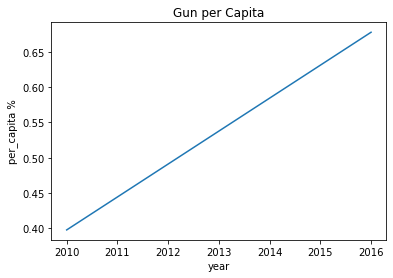

In [69]:
# creating a visual chart for per capita

year = [2010, 2016]
per_capita = [0.3978133307268642, 0.677793390263384]

plt.title('Gun per Capita')
plt.xlabel('year')
plt.ylabel('per_capita %')
plt.plot(year, per_capita)
plt.show()

#### **Answers:**
* Purchased guns per capita in 2010 = 0.39781%
* Purchased guns per capita in 2016 = 0.67779%

### RQ #2: Which states have had the most gun registrations in 2010 and 2016?

In [70]:
print(cen_diff.duplicated().sum())
print(gun_diff.duplicated().sum())

0
0


In [71]:
gun_diff.rename(columns = {'state' : 'State'}, inplace = True)

In [72]:
# merging cen_diff and gun_diff to check for any connections
gun_usa = cen_diff.merge(gun_diff, on = 'State', how = 'left')
gun_usa.head()

,State,Population_2010,Population_2016,month_x,totals_x,month_y,totals_y
0,index,1,0,NaT,NaN,NaT,NaN
1,Alabama,4780131,4863300,2010-04-01,20791.0,2016-07-01,48927.0
2,Alaska,710249,741894,2010-04-01,6411.0,2016-07-01,6793.0
3,Arizona,6392301,6931071,2010-04-01,16578.0,2016-07-01,34496.0
4,Arkansas,2916025,2988248,2010-04-01,14563.0,2016-07-01,19378.0


In [73]:
gun_usa[((gun_usa.State != 'index') & (gun_usa.Population_2010 != 1) & (gun_usa.Population_2016 != 0) & (gun_usa.month_x != 'NaT') & (gun_usa.totals_x != 'NaN') & (gun_usa.month_y != 'NaT') & (gun_usa.totals_y != 'NaN'))]

,State,Population_2010,Population_2016,month_x,totals_x,month_y,totals_y
1,Alabama,4780131,4863300,2010-04-01,20791.0,2016-07-01,48927.0
2,Alaska,710249,741894,2010-04-01,6411.0,2016-07-01,6793.0
3,Arizona,6392301,6931071,2010-04-01,16578.0,2016-07-01,34496.0
4,Arkansas,2916025,2988248,2010-04-01,14563.0,2016-07-01,19378.0
5,California,37254522,39250017,2010-04-01,80750.0,2016-07-01,190218.0
6,Colorado,5029324,5540545,2010-04-01,23609.0,2016-07-01,43094.0
7,Connecticut,3574114,3576452,2010-04-01,15922.0,2016-07-01,29755.0
8,Delaware,897936,952065,2010-04-01,1439.0,2016-07-01,4494.0
9,Florida,18804592,20612439,2010-04-01,42794.0,2016-07-01,125208.0
10,Georgia,9688680,10310371,2010-04-01,24065.0,2016-07-01,49183.0


In [74]:
gun_usa.rename(columns = {'month_x' : 'Months_2010'}, inplace = True)
gun_usa.rename(columns = {'month_y' : 'Months_2016'}, inplace = True)
gun_usa.rename(columns = {'totals_x' : 'Totals_2010'}, inplace = True)
gun_usa.rename(columns = {'totals_y' : 'Totals_2016'}, inplace = True)

In [75]:
gun_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   State            51 non-null     object        
 1   Population_2010  51 non-null     int32         
 2   Population_2016  51 non-null     int32         
 3   Months_2010      50 non-null     datetime64[ns]
 4   Totals_2010      50 non-null     float64       
 5   Months_2016      50 non-null     datetime64[ns]
 6   Totals_2016      50 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int32(2), object(1)
memory usage: 2.8+ KB


In [143]:
# getting the data from 2017
gun17 = gun_capita[gun_capita['month'] == '2017-09-01']
gun17.head(5)

,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506


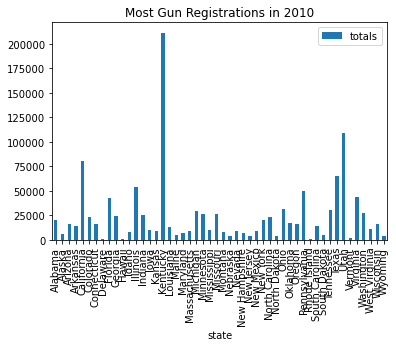

In [144]:
# plot 2010
gun10.plot(x = 'state', y = 'totals', kind = 'bar', title = 'Most Gun Registrations in 2010');

In [145]:
# listing 10 states with the highest gun purchases in 2010
gun10.sort_values(by = ['totals'], axis = 0, ascending = False).head(10)

,month,state,totals
16,2010-04-01,Kentucky,211261
43,2010-04-01,Utah,109391
4,2010-04-01,California,80750
42,2010-04-01,Texas,65012
12,2010-04-01,Illinois,53929
37,2010-04-01,Pennsylvania,50249
45,2010-04-01,Virginia,44137
8,2010-04-01,Florida,42794
34,2010-04-01,Ohio,31312
41,2010-04-01,Tennessee,30453


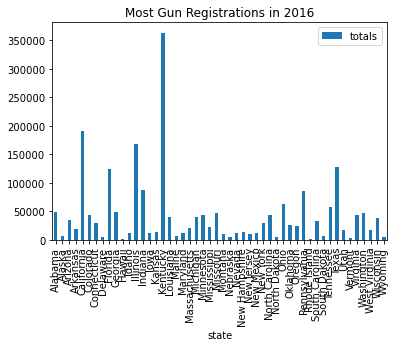

In [146]:
gun16.plot(x = 'state', y = 'totals', kind = 'bar', title= 'Most Gun Registrations in 2016');

In [147]:
# listing 10 states with the highest gun purchases in 2016
gun16.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,totals
16,2016-07-01,Kentucky,363085
4,2016-07-01,California,190218
12,2016-07-01,Illinois,168227
42,2016-07-01,Texas,127207
8,2016-07-01,Florida,125208
13,2016-07-01,Indiana,88340
37,2016-07-01,Pennsylvania,86137
34,2016-07-01,Ohio,63148
41,2016-07-01,Tennessee,57653
9,2016-07-01,Georgia,49183


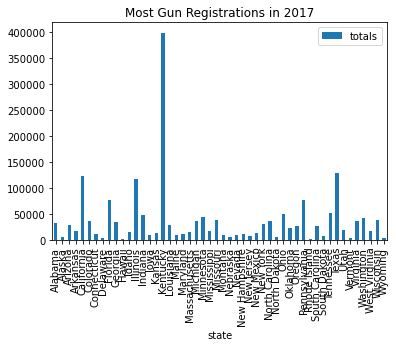

In [148]:
gun17.plot(x = 'state', y = 'totals', kind = 'bar', title= 'Most Gun Registrations in 2017');

In [149]:
# listing 10 states with the highest gun purchases in 2017
gun17.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,totals
18,2017-09-01,Kentucky,398706
46,2017-09-01,Texas,128260
4,2017-09-01,California,123506
14,2017-09-01,Illinois,116449
9,2017-09-01,Florida,77390
40,2017-09-01,Pennsylvania,77003
45,2017-09-01,Tennessee,50945
37,2017-09-01,Ohio,49942
15,2017-09-01,Indiana,48524
25,2017-09-01,Minnesota,44552


#### **Answers:**

**_Top 10 States in 2010 with the most gun registrations in 2010:_**

- Kentucky
- Utah
- California
- Texas
- Illinois
- Pennsylvania
- Virginia
- Florida
- Ohio
- Tennessee

**_Top 10 States in 2016 with the most gun registrations in 2016:_**

- Kentucky
- California
- Illinois
- Texas
- Florida
- Indiana
- Pennsylvania
- Ohio
- Tennessee
- Georgia

**_Top 10 States in 2016 with the most gun registrations in 2017:_**

- Kentucky
- Texas
- California
- Illinois
- Florida
- Pennsylvania
- Tennessee
- Ohio
- Indiana
- Minnesota

### RQ #3: What was the most purchased type of gun in 2010? What was the most purchased type of gun in 2016?

In [80]:
# creating new table for standard gun purchases
gun_purchases_data = gun.drop([ 'permit', 'permit_recheck', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], axis = 1)

In [81]:
gun_purchases_data.head()

,month,state,handgun,long_gun,other,multiple
0,2017-09,Alabama,5734.0,6320.0,221.0,317
1,2017-09,Alaska,2320.0,2930.0,219.0,160
2,2017-09,Arizona,11063.0,7946.0,920.0,631
3,2017-09,Arkansas,4347.0,6063.0,165.0,366
4,2017-09,California,37165.0,24581.0,2984.0,0


In [82]:
# creating table for gun purchases in 2010
gun_010 = gun_purchases_data[gun_purchases_data['month'] == '2010-04']

In [83]:
gun_010.head()

,month,state,handgun,long_gun,other,multiple
4895,2010-04,Alabama,8727.0,8095.0,131.0,394
4896,2010-04,Alaska,2650.0,3136.0,64.0,135
4897,2010-04,Arizona,7787.0,5097.0,198.0,309
4898,2010-04,Arkansas,3865.0,3833.0,45.0,197
4899,2010-04,California,26170.0,27650.0,0.0,0


In [84]:
gun_010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4895 to 4949
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     50 non-null     object 
 1   state     50 non-null     object 
 2   handgun   50 non-null     float64
 3   long_gun  50 non-null     float64
 4   other     50 non-null     float64
 5   multiple  50 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ KB


In [85]:
# Checking the differences

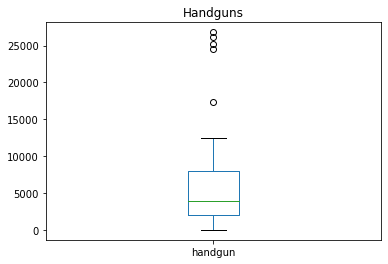

In [86]:
gun_010['handgun'].plot(kind='box', title = 'Handguns');

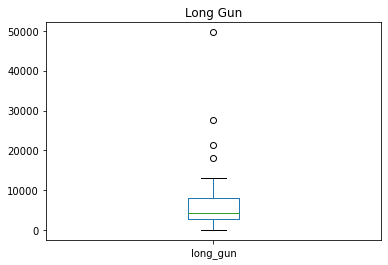

In [87]:
gun_010['long_gun'].plot(kind='box', title = 'Long Gun');

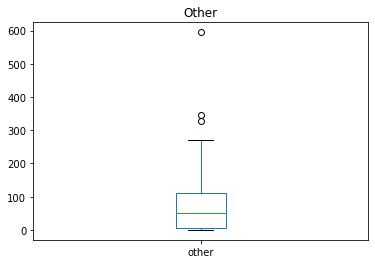

In [88]:
gun_010['other'].plot(kind='box', title = 'Other');

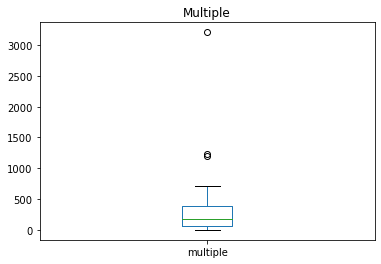

In [89]:
gun_010['multiple'].plot(kind='box', title = 'Multiple');

In [90]:
print(gun_010['handgun'].sum())
print(gun_010['long_gun'].sum())
print(gun_010['other'].sum())
print(gun_010['multiple'].sum())

313739.0
349245.0
4366.0
15411


In [91]:
# standard gun purchases (other, mutiple, handgun, long_gun)

gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [313739, 349245, 4366, 15411]

In [92]:
yman = np.arange(len(gun))
yman

array([0, 1, 2, 3])

No handles with labels found to put in legend.


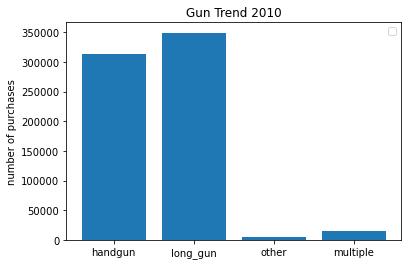

In [93]:
plt.xticks(yman, gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2010')
plt.bar(yman, purchases )
plt.legend()

In [94]:
# creating table for gun purchases in 2016
gun_016 = gun_purchases_data[gun_purchases_data['month'] == '2016-07']
gun_016.head()

,month,state,handgun,long_gun,other,multiple
770,2016-07,Alabama,10132.0,7392.0,538.0,465
771,2016-07,Alaska,2898.0,2816.0,239.0,165
772,2016-07,Arizona,13693.0,8643.0,1283.0,642
773,2016-07,Arkansas,6323.0,5053.0,325.0,367
774,2016-07,California,46361.0,47594.0,17297.0,0


In [95]:
gun_016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 770 to 824
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     50 non-null     object 
 1   state     50 non-null     object 
 2   handgun   50 non-null     float64
 3   long_gun  50 non-null     float64
 4   other     50 non-null     float64
 5   multiple  50 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ KB


In [96]:
# checking the differences

<AxesSubplot:title={'center':'Handguns'}>

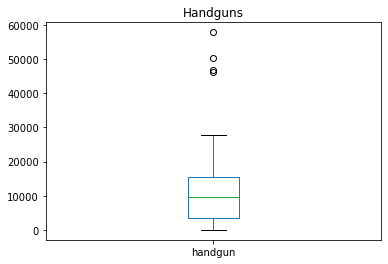

In [97]:
gun_016['handgun'].plot(kind = 'box', title = 'Handguns')

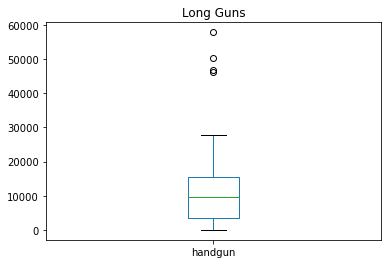

In [98]:
gun_016['handgun'].plot(kind='box', title = 'Long Guns');

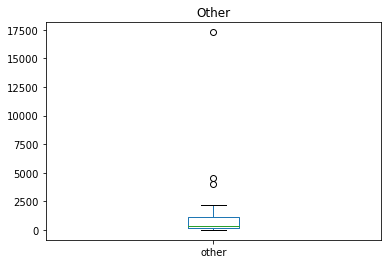

In [99]:
gun_016['other'].plot(kind='box', title = 'Other');

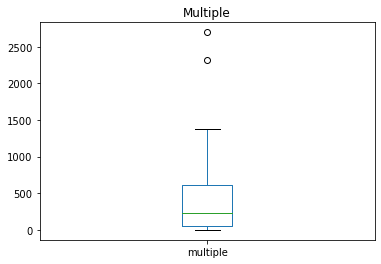

In [100]:
gun_016['multiple'].plot(kind='box', title = 'Multiple');

In [101]:
print(gun_016['handgun'].sum())
print(gun_016['long_gun'].sum())
print(gun_016['other'].sum())
print(gun_016['multiple'].sum())

627515.0
440051.0
53287.0
21390


In [102]:
# standard gun purchases (other, mutiple, handgun, long_gun)
gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [627515, 440051, 53287, 21390]

In [103]:
yman = np.arange(len(gun))
yman

array([0, 1, 2, 3])

No handles with labels found to put in legend.


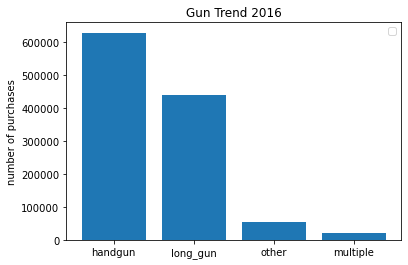

In [104]:
plt.xticks(yman, gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2016')
plt.bar(yman, purchases )
plt.legend()

In [121]:
# creating a new table for gun purchases in 2017
gun_017 = gun_purchases_data[gun_purchases_data['month'] == '2017-09']
gun_017.head()

,month,state,handgun,long_gun,other,multiple
0,2017-09,Alabama,5734.0,6320.0,221.0,317
1,2017-09,Alaska,2320.0,2930.0,219.0,160
2,2017-09,Arizona,11063.0,7946.0,920.0,631
3,2017-09,Arkansas,4347.0,6063.0,165.0,366
4,2017-09,California,37165.0,24581.0,2984.0,0


In [122]:
gun_017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     50 non-null     object 
 1   state     50 non-null     object 
 2   handgun   50 non-null     float64
 3   long_gun  50 non-null     float64
 4   other     50 non-null     float64
 5   multiple  50 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ KB


In [123]:
# checking the differences

<AxesSubplot:title={'center':'Handguns'}>

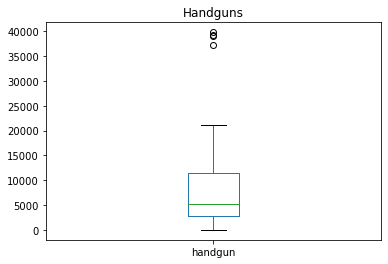

In [124]:
gun_017['handgun'].plot(kind = 'box', title = 'Handguns')

<AxesSubplot:title={'center':'Handguns'}>

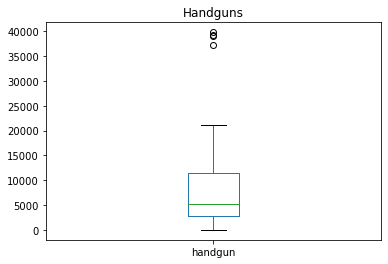

In [125]:
gun_017['long_gun'].plot(kind = 'box', title = 'Long Guns')

<AxesSubplot:title={'center':'Handguns'}>

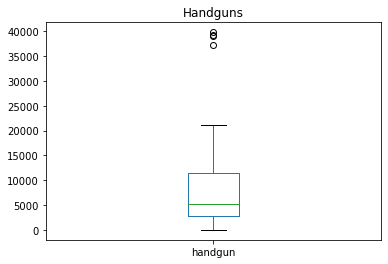

In [126]:
gun_017['other'].plot(kind = 'box', title = 'Other')

<AxesSubplot:title={'center':'Multiple'}>

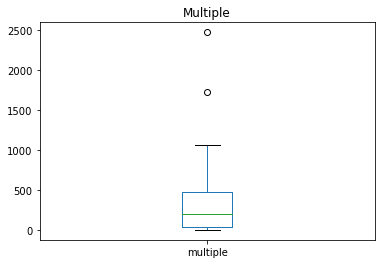

In [131]:
gun_017['multiple'].plot(kind = 'box', title = 'Multiple')

In [132]:
print(gun_017['handgun'].sum())
print(gun_017['long_gun'].sum())
print(gun_017['other'].sum())
print(gun_017['multiple'].sum())

477315.0
417126.0
26897.0
17612


In [136]:
# standard gun purchases (other, mutiple, handgun, long_gun)
gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [477315, 417126, 26897, 17612]

In [137]:
yman = np.arange(len(gun))
yman

array([0, 1, 2, 3])

No handles with labels found to put in legend.


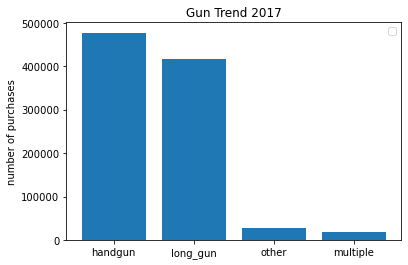

In [138]:
plt.xticks(yman, gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2017')
plt.bar(yman, purchases )
plt.legend()

#### **Answer:**

* Most purchased gun in 2010 was the **Long Gun**.
* Most purchased gun in 2016 was the **Hand Gun**.
* Most purchased gun in 2017 was the **Hand Gun**

### RQ #4: What is the percentage breakdown of average registered gun types in 2010, 2016, and 2017?

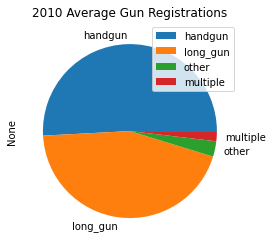

In [139]:
# average gun registrations of 2010, 2016, 2017
gun_010.mean().plot(kind='pie', title = '2010 Average Gun Registrations').legend();

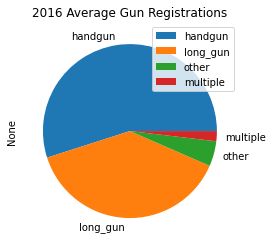

In [140]:
# average gun registrations of 2016
gun_016.mean().plot(kind='pie', title = '2016 Average Gun Registrations').legend();

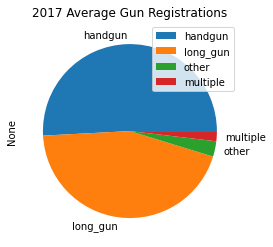

In [141]:
# average gun registrations of 2017
gun_017.mean().plot(kind='pie', title = '2017 Average Gun Registrations').legend();

## _In Conclusion_

In conclusion, The gun and census data shared similar variables such as states and date. Comparing and contrasting both data by countries and date would give the idea about the gun registration per capita in 2010, 2016, and 2017. Gun registration per capita in 2010 equal to 0.398%; however, in 2016, gun registration per capita is equivalent to 0.678%. Additionally, states such as Kentucky, California, Texas, Florida, and Ohio are the most common states with high gun records in 2010, 2016, 2017. The type of guns that the population in the United States purchased the most in 2010 are primarily long guns; however, in 2016 and 2017 the most purchased type of guns were handguns.

When it comes to the limitations, there is missing data for U.S colonies such as Puerto Rico, Guam, etc. in the US Census data. It would be appropriate to include them in the census data to calculate and check the result of guns purchased per capita. Secondly, I believe that Kentucky might be an outlier among the states. By observing Kentucky from 2010 and 2016-- the record is surprisingly higher than other American states like Lousiana. In my opinion, it would be reasonable to recheck the data from Kentucky. In different ways, Illinois might be an outlier too because it has been registered a high gun registration in the U.S-- however, Illinois has the strictest gun control in America. It is advised to further the investigation of the states of Illinois. 

It does seem to me that the size was relatively sufficient for my judgement about the questions we're asking here. I think even with some data missing, it didn't seem to skew the data too much either way once fully cleaned up. However, I believe as with all things, there can always be improvement.

source: https://www.politifact.com/illinois/statements/2017/oct/03/sarah-huckabee-sanders/chicago-toughest-gun-control-claim-shot-full-holes/

In [150]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'FBI Gun Data Deep Dive.ipynb'])

1